In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

import statistics
import scipy
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2
from scipy.fft import *

import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

from all_methods import simpleCS, simpleWW, simpleKW

<br>

### Dataset analysis: IBOV data sinsce begininng of Covid' pandemic, 01/04/2020, até 22/02/2024
> TimeFrame D1 (time series daily instances)

<hr>

In [3]:
ibov_df = pd.read_csv('dataset/ibov.csv')
ibov_df.set_index('time', inplace = True)
ibov_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 972 entries, 2020-03-26 to 2024-02-22
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         972 non-null    float64
 1   high         972 non-null    float64
 2   low          972 non-null    float64
 3   close        972 non-null    float64
 4   tick_volume  972 non-null    int64  
 5   spread       972 non-null    int64  
 6   real_volume  972 non-null    int64  
 7   mma_20       953 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 68.3+ KB


In [11]:
ibov_df.head(1)

,open,high,low,close,tick_volume,spread,real_volume,mma_20
time,,,,,,,,
2020-03-26,74956.0,78846.0,74923.0,77710.0,2922993,0,1276642700,NaN


In [10]:
ibov_df.tail(1)

,open,high,low,close,tick_volume,spread,real_volume,mma_20
time,,,,,,,,
2024-02-22,130035.0,130830.0,129971.0,130241.0,1352937,0,1077283744,128562.4


<Axes: xlabel='time'>

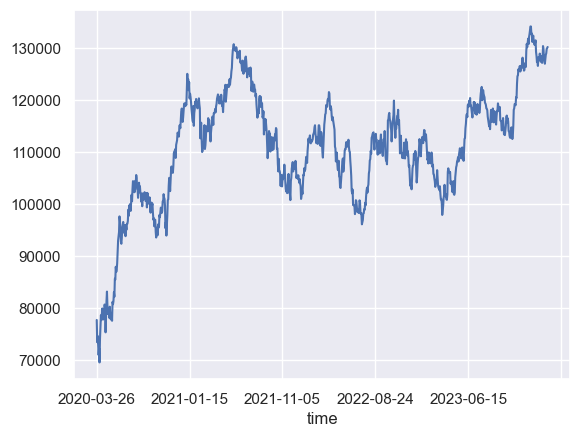

In [4]:
ibov_df['close'].plot()

## Presentation Scope:
1) EDA of the dataset:
- Analysis of the trend and seasonality of the complete dataset
### Application of Trend and Seasonality tools
2) Fourier at different moments of the IBOV price:
- Application of Fourier in Trend
- Application of Fourier in the Stationary period
- Investigate trend component in the Frequency domain.
3) Modeling:
- Application of prediction model in the trend period of the raw dataset.
- Application of prediction model on smoothed dataset (8p mma)
- Application of prediction model on smoothed dataset (wavelet)
- Compare distance results between prediction and real value between datasets.

<br>

### 1) EDA IBOV dados de fechamento de mercado

<hr>

>Cox_Stuart

In [5]:
# SIMPLE_CS

close_values = ibov_df['close'].iloc[:450].to_list()
close_values = [int(x) for x in close_values] 
close_values = np.array(close_values)

trend_type = 'r'
pvalue = simpleCS(close_values, trend_type=trend_type)

if pvalue < 0.05 and trend_type == 'r':
    print(f'Periodo analisado está em tendencia.\npValue = {pvalue}')
elif pvalue >= 0.05:
    print('Dados não segue uma tendencia de alta.')

Periodo analisado está em tendencia.
pValue = 2.873257187729905e-13


<br>

>Wald_Wolfowitz

In [6]:
# SIMPLE_WW

length_rval, n1, n2, N, pValue = simpleWW(close_values)
print(f'Valor de pValue registrado para método simpleWW (Wald Walfowitz): {pValue}')

Valor de pValue registrado para método simpleWW (Wald Walfowitz): 0.0


C:\Users\erlon\Documents\Medium-blog-post\Predicting_Stocks_market\all_methods.py:82: RuntimeWarning: overflow encountered in scalar multiply
  stdev = np.sqrt(2 * n1 * n2 * (2 * n1 * n2 - N)/(N * N * (N - 1)))


<br>

>Kruskal_wallis

In [7]:
bool_sazon = False
for i in np.arange(2,200):
    pValue = simpleKW(close_values, i)
    if pValue <= 0.05:
        print(f'Sasonalizade encontrada na frequencia {i}, pValue de: {pValue}')
        bool_sazon = True
if not bool_sazon:
    print('Esses dados não apresentam informações de sazonalidade.')

Esses dados não apresentam informações de sazonalidade.


### Conclusion:

#### The results shows that for the whole dataset, two techniques prove trend up.

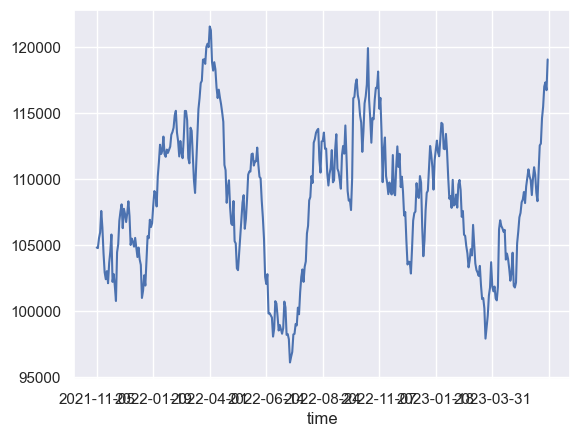

In [8]:
faixa_estacionaria = ibov_df['close'].iloc[400:800].plot()

In [9]:
f_estacionario = ibov_df['close'].iloc[400:800].to_list()
f_estacionario = [int(x) for x in f_estacionario] 
f_estacionario = np.array(f_estacionario)

In [10]:
bool_sazon = False
for i in np.arange(2,200):
    pValue = simpleKW(f_estacionario, i)
    if pValue <= 0.01:
        print(f'Sasonalizade encontrada na frequencia {i}, pValue de: {pValue}')
        bool_sazon = True
if not bool_sazon:
    print('Esses dados não apresentam informações de sazonalidade.')

Sasonalizade encontrada na frequencia 146, pValue de: 0.006923060150580307
Sasonalizade encontrada na frequencia 147, pValue de: 0.0032061555599149916
Sasonalizade encontrada na frequencia 148, pValue de: 0.0011174888698299856
Sasonalizade encontrada na frequencia 149, pValue de: 0.00034914924402107417
Sasonalizade encontrada na frequencia 150, pValue de: 0.0001629191791447937
Sasonalizade encontrada na frequencia 151, pValue de: 7.124239231759422e-05
Sasonalizade encontrada na frequencia 152, pValue de: 3.442087061333865e-05
Sasonalizade encontrada na frequencia 153, pValue de: 1.6376213628599423e-05
Sasonalizade encontrada na frequencia 154, pValue de: 6.878731258153081e-06
Sasonalizade encontrada na frequencia 155, pValue de: 3.33271952068781e-06
Sasonalizade encontrada na frequencia 156, pValue de: 1.1019039216630944e-06
Sasonalizade encontrada na frequencia 157, pValue de: 3.7569628263955934e-07
Sasonalizade encontrada na frequencia 158, pValue de: 2.171731257050169e-07
Sasonaliza

>A parte estacionaria avaliada pelo método de simpleKW possui sazonalidade.

<br>

### 2) FFT in IBOV's price

<hr>

<Axes: xlabel='time'>

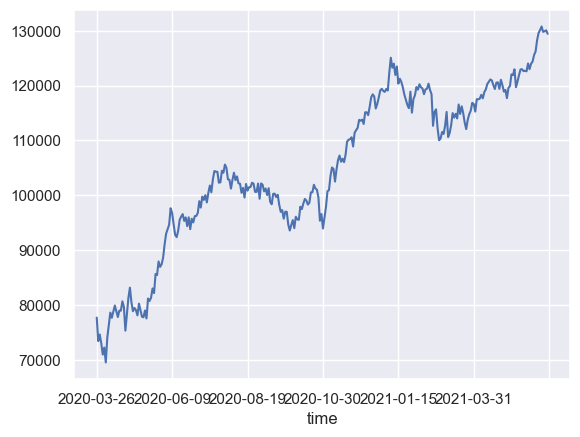

In [11]:
up_trend = ibov_df['close'].iloc[:300].plot()
up_trend

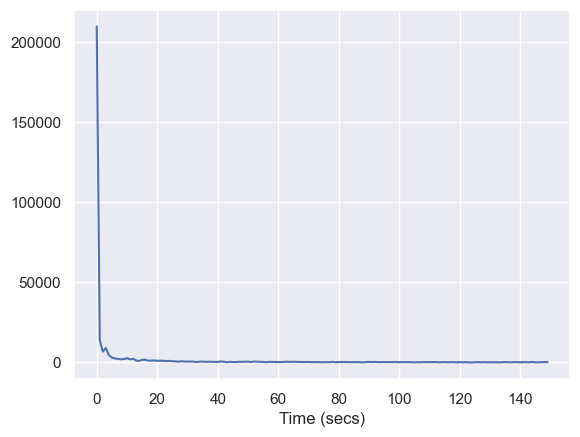

In [12]:
tn = 1
N = 300
T = tn/N

upTrend = ibov_df['close'].iloc[:300].to_list()
upTrend = [int(x) for x in upTrend] 
upTrend = np.array(upTrend)

yf = fft(upTrend)
xf = fftfreq(N, T)[:N//2]

#plt.plot(np.arange(N), 2.0/N * np.abs(yf)) #espelho
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlabel('Time (secs)')
plt.grid(True)
plt.show()

In [12]:
np.abs(yf[0:N//2])[0:15]

array([31478470.        ,  2092151.54022818,  1021237.34623454,
        1359559.20994484,   694167.79272949,   454836.71668852,
         381031.85805445,   331930.63727722,   292723.68509512,
         323898.67848393,   400198.36896615,   290545.62627471,
         344308.55139727,   185425.82421091,   145133.7625435 ])

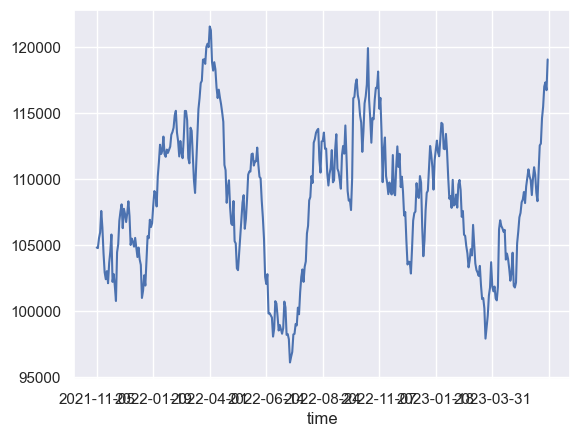

In [13]:
faixa_estacionaria = ibov_df['close'].iloc[400:800].plot()

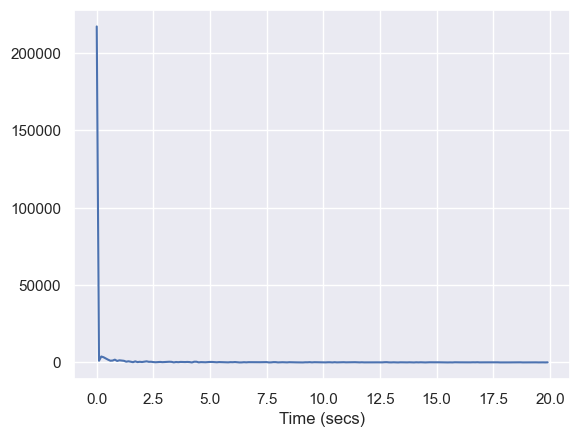

In [14]:
N = 400
tn = 10
T = tn/N

yf = fft(f_estacionario)
xf = fftfreq(N, T)[:N//2]

#plt.plot(np.arange(N), 2.0/N * np.abs(yf)) #espelho
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlabel('Time (secs)')
plt.grid(True)
plt.show()

In [16]:
np.abs(yf[0:N//2])[0:15]

array([43424260.        ,   220985.95202569,   770154.56173567,
         674701.71828929,   516312.61730013,   358352.20173355,
         227103.78920168,   245633.98090383,   364156.87281236,
         194373.67756686,   279296.28895518,   243020.15659889,
         213393.29718959,   101361.97768566,   152034.01733126])

### This methods response shows that FFT is not the right tool to analyze trend component, even though FFT is used to extract componentes frequency in senoidal/harmonic data.

<br>

### 3) Modelling: Technique Hot-Winter

<hr>

<Axes: xlabel='time'>

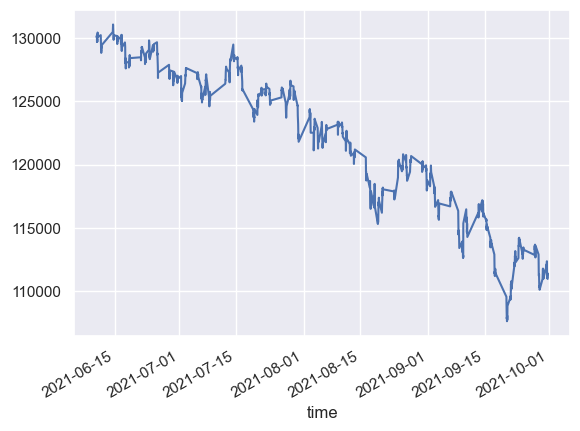

In [18]:
df_30min = pd.read_csv("dataset/ibov_tf30MIN.csv",index_col="time", parse_dates=True)
df_30min['close'].plot()

In [19]:
df_30min['close'] = df_30min['close'].apply(lambda x: int(x))
df = df_30min.copy().reset_index()

X_train = np.array(df.iloc[:880]['close'])
X_test = np.array(df.iloc[880:]['close'])

df_X_train = pd.DataFrame()
df_X_test = pd.DataFrame()

df_X_train['close'] = X_train
df_X_train.index = df.index[:880]

df_X_test['close'] = X_test
df_X_test.index = df.index[880:]

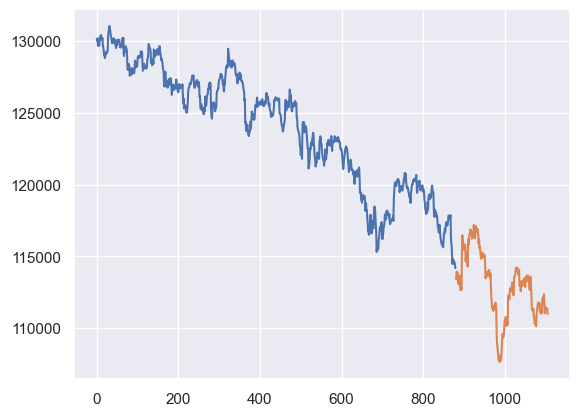

In [20]:
plt.plot(df_X_train)
plt.plot(df_X_test)

In [21]:
#treinar o modelo
model = ExponentialSmoothing(df_X_train['close'],
                             trend="mul", seasonal="mul",
                             seasonal_periods=180).fit()
#predizer observações
Y = model.forecast(226)

C:\Users\erlon\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


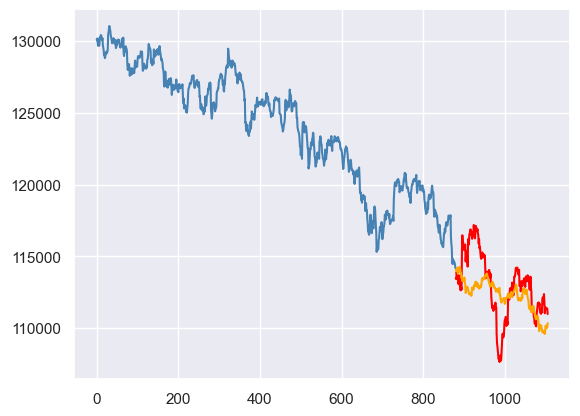

In [22]:
plt.plot(df_X_train, color ="steelblue")
plt.plot(df_X_test, color ="red")
plt.plot(Y, color = 'orange')

In [23]:
print("Validando o modelo:")
print(f"MSE: {mse(df_X_test, Y)}")
print(f"RMSE: {np.sqrt(mse(df_X_test, Y))}")
print(f"MAE: {mae(df_X_test, Y)}")
print(f"MAPE: {mape(df_X_test, Y)}")

Validando o modelo:
MSE: 4535462.4388002455
RMSE: 2129.662517583536
MAE: 1717.2603546199323
MAPE: 0.01517184963554254


<br>

### Considerando o sinal mais suavizado, com média móvel de 8p.

<hr>

In [24]:
df_X_test['close'] = df_X_test.rolling(window = 8)['close'].mean()
df_X_train['close'] = df_X_train.rolling(window = 8)['close'].mean()

In [25]:
#treinar o modelo
model = ExponentialSmoothing(df_X_train['close'].iloc[9:],
                             trend="mul", seasonal="mul",
                             seasonal_periods=180).fit()
#predizer observações
Y = model.forecast(218)

C:\Users\erlon\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


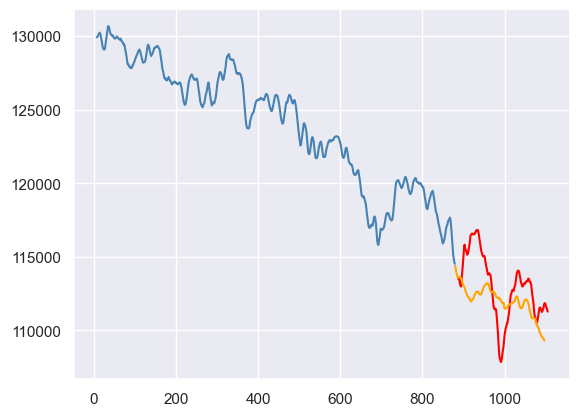

In [26]:
plt.plot(df_X_train, color ="steelblue")
plt.plot(df_X_test, color ="red")
plt.plot(Y, color = 'orange')

In [27]:
print("Validando o modelo:")
print(f"MSE: {mse(df_X_test.iloc[8:], Y)}")
print(f"RMSE: {np.sqrt(mse(df_X_test.iloc[8:], Y))}")
print(f"MAE: {mae(df_X_test.iloc[8:], Y)}")
print(f"MAPE: {mape(df_X_test.iloc[8:], Y)}")

Validando o modelo:
MSE: 5105951.859387427
RMSE: 2259.6353377010696
MAE: 1863.1207399716507
MAPE: 0.01642909654854141


Nossa conclusão é que a aplicação de uma média movel para suavizar a movimentação do preço produz uma perda de alguns detalhes do preço, o que ocasionalmente faz aumentar a diferença entre a predição e os dados de teste. 